# Multilayer Perceptron (Feed-Forward Network / Artificial Neural Network)
In this notebook we will cover the use of Keras for creating a very small neural network (MLP) to solve a binary classification problem. This is the simplest form of *supervised machine learning*.

## Pre-requisites
Uncomment the appropriate lines to install the packages. We will most likely be re-running this notebook several times, so you may wish to comment them again after installation (or use pip from command prompt).

Packages needed for this workshop:
- Keras
- Tensorflow
- Numpy
- Scikit-learn
- Pandas

Keras is built on top of Tensorflow. Scikit-learn is a library which focuses on machine learning algorithms and techniques, we will be using some utility functions from this. Pandas is a Data Science framework for wrangling data and dealing with large volumes in a nicer way; manually processing records and columns is a chore, this makes things simpler.



In [1]:
%pip install keras
%pip install tensorflow
%pip install numpy
%pip install scikit-learn
%pip install pandas

## Imports
Our main imports will be `tensorflow`, and `keras`. Just like with `numpy`, we often make use of aliases when importing `tensorflow` to make life easier.

One of the more useful imports we want to have is `from tensorflow.keras import layers`, this allows us to quickly define layers of our neural network.
E.g `layers.Dense(N)` for a single layer containing N of fully-connected perceptrons to/from surrounding layers.

*Note*: the layers import is strictly for convenience. We can access everything from the top-level module, tensorflow. `layers.Dense()` is equivalent to `tensorflow.keras.layers.Dense()`, but writing that everytime can make code confusing and hurt readability. Code readability is key to good software for you and your team.

When importing tensorflow, you may see some output related to cuda if you have a supported GPU. Tensorflow will automatically run on the GPU if supported, otherwise it will be on the CPU only. GPU acceleration is a huge part in why modern machine learning is so popular, performant, and efficient.

Here, we will use the `__version__` meta-attribute to check the version of both the base tensorflow library, and the keras library.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# We will use these later, best to import them up here.
import numpy as np
import sklearn
import pandas as pd

In [4]:
print(tf.__version__)
print(keras.__version__)

2.5.0
2.5.0


## Importing some Data - Wine Quality Classification

Before we can define our model, we first need to determine what our input is. What is the task we are trying to solve? What features are we looking at?

For this activity we're going to be looking at a simple dataset to get started. We're going to be looking at a cleaned and already preprocessed dataset from the UCI Machine Learning Repository. These data include 11 input features of various qualities of wine. Our task is to classify the wine as "good" or "bad". These classifications were derived from wine tasting scores. (Bhat, 2020)

Make sure you download the `wine.csv` file from Canvas. Put this in the same folder as your `.ipynb` notebook.

Bhat, N. (2020) “Wine Quality Classification.” Available at: https://www.kaggle.com/nareshbhat/wine-quality-binary-classification.

The file format is in that of a `.csv` file. A **comma seperated value** file. Each row represents a separate patient records, and our columns (features) are separated by `,`.

For our Data Description we have the following information from Bhat (2020).

Input variables (based on physicochemical tests):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):

12. quality ('good' and 'bad' based on score >5 and <5)


In [5]:
# Make sure to import pandas as pd somewhere in your file (we did this at the top)

# We can tell Pandas to read our CSV data file by giving it a file path.
training_data = pd.read_csv('./wine.csv')

In [6]:
training_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


### Initial Pre-processing

At the moment, our target variable (our last column), is mixed in with the rest of our data, and it's in the wrong format. We need to change bad -> 0, good -> 1.

Then we want to separate it into our input data (the features), and our target variable ( the thing we want to predict ).

In [7]:
# Grab the quality column, and then remove it from the main Dataframe.
training_y = training_data.pop('quality')

# Data needs to be numeric for us to work with it.
# We can use dataframe.replace to replace values with others.
# In this case, we'll replace "good" with 1, as we're making a good quality wine classifier.
#
# inplace=True means we don't need to assign it to a new variable.
training_y.replace("good", 1, inplace=True)
training_y.replace("bad", 0, inplace=True)

# This means training_data is left with the rest of the data.
# TODO: You can use training_data[["colA","colB","colC"]] etc to specify the names of columsn.
# E.g training_data[["citric acid", "chloriddes"]] would grab only those columns for citric acid, and chlorides from the dataframe.
# Note: training_data["single column"] for grabbing just one column.
#       training_data[["firstColumn", "secondColumn"]] if we want multiple columns.
# [] vs [[]]

training_x = training_data

In [8]:
training_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [9]:
training_y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

#### Converting Pandas DataFrame into a Numpy Array

If we try and pass our Pandas DataFrame (and all its magical properties) to our Keras neural network, it will most likely error. Once we're done with pre-processing and using Pandas utilities, we can convert the dataframe ready for input into the Neural Network. *These networks really are quite picky!*

I will define some new variables `arr_train_x` and `arr_train_y`, but you can override variable names if you wish.

In [10]:
arr_train_x = training_x.to_numpy()
arr_train_y = training_y.to_numpy()

In [11]:
print(arr_train_x)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


## Defining our Model

Usually Keras model definition is wrapped in a user-defined function. However, for the purposes of this small network, this is unnecessary.

Today we will be using the *Sequential API* for model definition. This is for straight-forward networks which are built layer-by-layer. For more complex networks, the *Functional API* is required (multi-input, multi-output, etc).

We define a new Sequential model, this will be empty. From this we can sequentially add layers, starting from the input and working towards our output.

The `layers.InputLayer` has a number of parameters we can provide it. Most importantly this will be the expected input shape. As we have already looked at the data we wish to pass this network, we know that we have 11 features (fixed acidity, volatile acidity, ..., sulphates), and the target variable (Wine Quality). Therefore, the input shape to our network is `(11)`.
*Note*: We need to ensure the shape is a `tuple`. E.g `(1, 2, 3)` using parenthese. This is because our input shape can get quite complex and multi-dimensional. E.g `(224,224,3)` is an example from Computer Vision for a single colour image.

Once we've defined all of our layers, we can run `model.summary()` and this will print out a list of our layers, their output shape, and how many tunable parameters (the thing which needs to be learned!) there are. The great thing about Keras is that all the calculations for shapes of all your vectors/matrices is done for you. You specify how many nodes per layer, and Keras does the rest. *This is certainly quicker than how we used to have to calculate this by hand!*

*Note*: You may see lots of output after our table from Keras/Tensorflow. This is most likely GPU finding. These models we're defining are graphs. These graphs go onto the CPU/GPU ready to be fed with data.

For this network we have our 11 input features, then a layer of **32** perceptrons (fully-connected to each input), the output of each of these hidden layer perceptrons is then fully-connected to the next layer, a layer of **1** perceptron (our output). For our hidden layer, the activation function is selected to be `relu`. Our final layer is the `sigmoid` output.

In [12]:
print(arr_train_x.shape)
print(arr_train_y.shape)

(1599, 11)
(1599,)


In [ ]:
model = keras.Sequential()

model.add(layers.InputLayer(input_shape=(11))) # 11 Columns of input

model.add(layers.Dense(32, activation="relu"))

model.add(layers.Dense(1, activation="sigmoid")) # 0->1 floating

model.summary()


## Compiling our Model

We have just defined our model, and the layers it has. However, this isn't everything. For a model to be trainable we need to define a loss function. I.e How do we calculate the difference between the network's output and the ground truth output (what it should be).

In our reading, we introduced this as the concept related to the distance squared between two real numbers. However, we're working with categories in our outputs here. We either have good wine, or bad wine. This is known as **binary classification**

For our optimiser, we will use **Stochastic Gradient Descent**; later on we will explore other optimiser, but let's keep the classic `sgd`.
We can tell Keras to automatically log some metrics. `accuracy` is one which it understands by default (A list can be found https://keras.io/api/metrics/accuracy_metrics/#binaryaccuracy-class)

### Loss Function
For this we are using `binary_crossentropy`. It's as simple as stating it as a string.

$$
H_{p}(q) = -\frac{1}{N}\sum_{i=1}^{N}y_{i}\cdot log(p(y_{i})) + (1-y_{i})\cdot log(1-p(y_{i}))
$$

Where:

$$
y_{i}\cdot log(p(y_{i}))
$$
If $y_{i}$ is 0, then this whole terms goes to 0. Conversely:

$$
(1-y_{i})\cdot log(1-p(y_{i})
$$
If $y_{i}$ is 1 (the other class), then this term goes to zero because of the $(1-y_{i})$.

Therefore, when we look at this equation, we either have the left side of the $+$, of the right side. In either case we are simply taking the `log()` of the class output. Hence why binary crossentropy is often refered to as the log-loss.

In [14]:
# Compile the model.
model.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

## Fitting our model

We have our model architecture defined. We have compiled it, providing the loss definition, the optimiser, and any metrics we wish to log. Now comes the time to train our model.

We provide the model with both the input data and the ground truth data for the target variable. From this, using the loss function, it will adjust its parameters (weights) to minimise the loss function.

An important parameter to provide when training is the number of epochs. An `epoch` is defined as a single iteration through the whole input dataset. E.g If we have 500 records, then 1 epoch is when all 500 records have been through the network (and backprop for learning). After a single epoch our network may not have learned the problem perfectly, so we can repeat over many epochs, gradually improving our network. At a certain stage, we will hit some limitation where more examples do not improve the network. We will have stagnated, and training should stop.

For now, we are going to set this to an initial value of 50. We can modify this later to see what happens.
Provide your `training_x` and `training_y` data to the fit function. X first, labels second.

In [ ]:
model_training_history = model.fit(
    arr_train_x,
    arr_train_y,
    epochs = 50
)

## Evaluating our Model
### Plotting Loss and Accuracy curves using History

When fitting our Keras model, we can get a `History` object back out. This contains the metrics for loss for each epoch, as well as any additional metrics we defined (such as accuracy).

If we `print(model_training_history.history.keys())` we can see what's available to us. This is because our rich History object (we called it model_training_history), has a dictionary inside (called history). If we get all the keys to that dictionary we can see the metrics it's stored.

In [16]:
print(model_training_history.history.keys())

dict_keys(['loss', 'accuracy'])


We can use a library called Matplotlib to help us graph these metrics per epoch. This will provide us an idea of how our model was during training, and can help us determine what to do.

Text(0.5, 0, 'epochs')

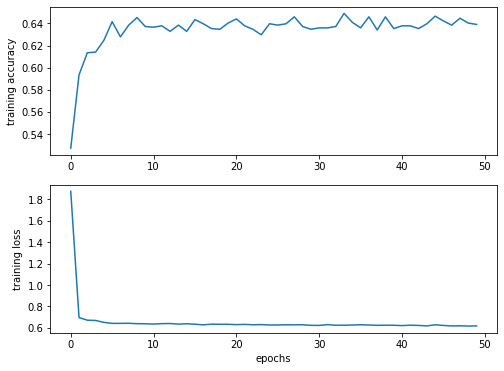

In [17]:
import matplotlib.pyplot as plt

# If we want to be fancy, we can set a theme by uncommenting the below line.
#plt.style.use('ggplot')

# Set up a figure, and two handles for our 2 figures.
# Subplot can make many many plots within a single figure.
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

# Get our accuracy and loss metrics (these should be lists of numbers)
acc = model_training_history.history['accuracy']
loss = model_training_history.history['loss']

# We want accuracy on our first graph
ax1.plot(acc)
# Loss on our second
ax2.plot(loss)
    
# Give our figures some x and y axis labels.
ax1.set_ylabel('training accuracy')
ax2.set_ylabel('training loss')

# They both share an x axis, so we only need to define it on the bottom-most.
ax2.set_xlabel('epochs')

### Task - Good Practice: We need hold-out data. Where's the test set?

We made a mistake when training our Neural Network. We used all of our data for training. Now we have a fully-trained model, but it's seen all of the data we have. We can't evaluate it purely on the training data. That would be like asking you to take an exam where we've already shown you the answers!

Therefore, we should have partitioned our initial dataset into a training and a test set. We can use sklearn for this.

`train_test_split` is a utility function which accepts our X data, and labels: y. It can partition (we have chosen test_size of 30%) as well as shuffle our data for us. Here we provide a `random_state` so that it will shuffle the same way everytime (deterministic) for testing purposes. In the real-world we would not leave this in.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



In [18]:
from sklearn.model_selection import train_test_split

# Train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    arr_train_x, arr_train_y, test_size=0.3, random_state=2, shuffle=True)

print(X_train.shape)
print(X_test.shape)

(1119, 11)
(480, 11)


Now we have a roughly 70-30 split for our data, as well as our labels.

#### Do the following:

Go back to our training procedure from before, and insert this train_test_split functionality before we get to training our model. Re-run your experiment using the <u>training set</u>.

### Task 2 - Evaluation Metrics

In this week's reading we looked at some evaluation metrics for classification tasks, including the confusion matrix. Sklearn has some functionality for `classification_report` and `confusion_matrix` which we can use.

```python
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
```

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

We can use `model.evaluate(test_x, test_y)` to run through our test set and provide some loss and accuracy metrics.

Additional, we can introduce `model.predict()` and provide input data to the model. This will run a forward pass on the data to obtain the network's estimate. This is called *inference*. Once we have all the predicted y values, we can run our own metric calculations.

In [19]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(test_loss, test_acc)

15/15 [==============================] - 0s 666us/step - loss: 0.6137 - accuracy: 0.6604
0.6136506795883179 0.6604166626930237


In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Ground truth Y data, predicted Y data.
# We have to threshold our network ourselves currently due to the sigmoid output.
# We can interpret this output as a form of probability or confidence value. Closer to 1, the more probable.
# We will assume that >= 0.5 is a 1, and < 0.5 is a 0.

print(confusion_matrix(Y_test, np.round(y_pred) ))

# We can even assign variables to the output! adding .ravel() to the conf matrix.
tn, fp, fn, tp = confusion_matrix(Y_test, np.round(y_pred) ).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")

[[106  87]
 [ 76 211]]
TP: 211
FP: 87
TN: 106
FN: 76


We can also use the `ConfusionMatrixDisplay` utility of sklearn to visualise our matrix.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

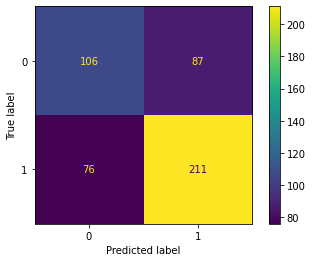

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Y_test, np.round(y_pred))

#### Calculate
Calculate the Precision, Recall, and F1-Score from the TP/TN/FP/FN metrics above. **Remember**: This is for the test set only, we can call `.shape` on them to get the number of rows and features.

## Task 3 - Experimentation

Go back through the code in this activity and try the following experiments:
* Change the values for the number of hidden nodes in a single hidden layer
* Change the number of hidden layers
* Vary the number of neurons in both of these layers
* Modify the Epoch numbers and observe the loss graphs.

Your goal is to see the impact that these changes have on the overall accuracy, confusion matrix, precision/recall/f-1 scores. Be sure not to change too many all at once, otherwise you won't know what caused the change.